# Transport 

In [623]:
#Import libraries
import pandas as pd
import numpy as np
import os 
import seaborn as  sns
import math
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 
import scipy.stats as ss
from scipy.special import comb
import calendar

In [624]:
from PIL import Image

(-0.5, 465.5, 406.5, -0.5)

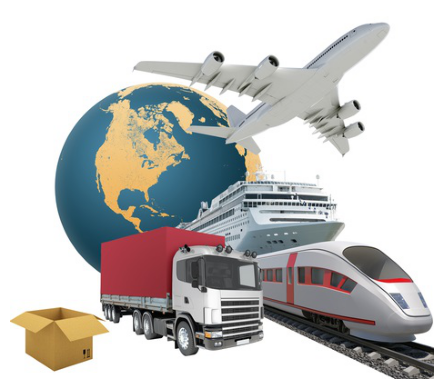

In [625]:
imagen= mpimg.imread('Transport.jpg')
plt.imshow(imagen)
plt.axis('off')  
plt.show()

In [626]:
#Import DataBases

IRL= pd.read_csv("Plublic Transport Ireland.csv")
IRLuas= pd.read_csv("TOA11 - Luas Passenger Numbers Ireland.csv")
IRLFM=pd.read_csv("Trail Trafict Ireland.csv")

#Additional Countries
NRW= pd.read_csv("Bus Norway.csv")
NZL= pd.read_csv("PT005 - Public transport boardings by mode New Zealand.csv")

# Data cleaning

In [549]:
#First Database
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,NaN
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0


In [550]:
IRL.info

<bound method DataFrame.info of      STATISTIC     Statistic Label TLIST(W1)          Week  C03935V04687  \
0     THA25C01  Passenger Journeys   2019W01  2019 Week 01            10   
1     THA25C01  Passenger Journeys   2019W01  2019 Week 01            20   
2     THA25C01  Passenger Journeys   2019W01  2019 Week 01            30   
3     THA25C01  Passenger Journeys   2019W01  2019 Week 01            40   
4     THA25C01  Passenger Journeys   2019W02  2019 Week 02            10   
...        ...                 ...       ...           ...           ...   
1019  THA25C01  Passenger Journeys   2023W43  2023 Week 43            40   
1020  THA25C01  Passenger Journeys   2023W44  2023 Week 44            10   
1021  THA25C01  Passenger Journeys   2023W44  2023 Week 44            20   
1022  THA25C01  Passenger Journeys   2023W44  2023 Week 44            30   
1023  THA25C01  Passenger Journeys   2023W44  2023 Week 44            40   

                         Mode of Transport    UNIT     

In [551]:
IRL.dtypes

STATISTIC             object
Statistic Label       object
TLIST(W1)             object
Week                  object
C03935V04687           int64
Mode of Transport     object
UNIT                  object
VALUE                float64
dtype: object

# Missing information

In [552]:
IRL.isnull()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1019,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False


In [553]:
IRL.isnull().sum()

STATISTIC             0
Statistic Label       0
TLIST(W1)             0
Week                  0
C03935V04687          0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64

In [554]:
IRL.fillna(0, inplace=True)
IRL.isnull()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1019,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False


In [555]:
IRL.isnull().sum()

STATISTIC            0
Statistic Label      0
TLIST(W1)            0
Week                 0
C03935V04687         0
Mode of Transport    0
UNIT                 0
VALUE                0
dtype: int64

In [556]:
print(IRL['Mode of Transport'].head())

0                        Dublin Metro Bus
1             Bus, excluding Dublin Metro
2                                    Rail
3    All public transport, excluding LUAS
4                        Dublin Metro Bus
Name: Mode of Transport, dtype: object


In [557]:
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,0.0
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0


In [558]:
IRL= IRL[IRL['Mode of Transport'] != 'All public transport, excluding LUAS']
IRL

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,0.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0
5,THA25C01,Passenger Journeys,2019W02,2019 Week 02,20,"Bus, excluding Dublin Metro",Number,633764.0
...,...,...,...,...,...,...,...,...
1017,THA25C01,Passenger Journeys,2023W43,2023 Week 43,20,"Bus, excluding Dublin Metro",Number,974091.0
1018,THA25C01,Passenger Journeys,2023W43,2023 Week 43,30,Rail,Number,888050.0
1020,THA25C01,Passenger Journeys,2023W44,2023 Week 44,10,Dublin Metro Bus,Number,3043578.0
1021,THA25C01,Passenger Journeys,2023W44,2023 Week 44,20,"Bus, excluding Dublin Metro",Number,811636.0


In [559]:
print(IRL['Mode of Transport'].head())

0               Dublin Metro Bus
1    Bus, excluding Dublin Metro
2                           Rail
4               Dublin Metro Bus
5    Bus, excluding Dublin Metro
Name: Mode of Transport, dtype: object


# Group by month 

In [560]:
IRL['Year'] = IRL['Week'].str.slice(0, 4)  # to get the first 4 characters (year)
IRL['Week_Number'] = IRL['Week'].str.slice(-2)  # Last 2 characters (week number)
IRL['Week_Number'] = IRL['Week_Number'].astype(int)  # Convert to integer type
IRL

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE,Year,Week_Number
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0,2019,1
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0,2019,1
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,0.0,2019,1
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0,2019,2
5,THA25C01,Passenger Journeys,2019W02,2019 Week 02,20,"Bus, excluding Dublin Metro",Number,633764.0,2019,2
...,...,...,...,...,...,...,...,...,...,...
1017,THA25C01,Passenger Journeys,2023W43,2023 Week 43,20,"Bus, excluding Dublin Metro",Number,974091.0,2023,43
1018,THA25C01,Passenger Journeys,2023W43,2023 Week 43,30,Rail,Number,888050.0,2023,43
1020,THA25C01,Passenger Journeys,2023W44,2023 Week 44,10,Dublin Metro Bus,Number,3043578.0,2023,44
1021,THA25C01,Passenger Journeys,2023W44,2023 Week 44,20,"Bus, excluding Dublin Metro",Number,811636.0,2023,44


In [561]:
IRL['Week'] = IRL['Year'].astype(str) + ' ' + IRL['Week_Number'].astype(str)
IRL['Date'] = pd.to_datetime(IRL['Week'] + ' 0', format='%Y %U %w')
IRL['Month'] = IRL['Date'].dt.month.apply(lambda x: calendar.month_name[x])
IRL

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE,Year,Week_Number,Date,Month
0,THA25C01,Passenger Journeys,2019W01,2019 1,10,Dublin Metro Bus,Number,1987891.0,2019,1,2019-01-06,January
1,THA25C01,Passenger Journeys,2019W01,2019 1,20,"Bus, excluding Dublin Metro",Number,497598.0,2019,1,2019-01-06,January
2,THA25C01,Passenger Journeys,2019W01,2019 1,30,Rail,Number,0.0,2019,1,2019-01-06,January
4,THA25C01,Passenger Journeys,2019W02,2019 2,10,Dublin Metro Bus,Number,2709579.0,2019,2,2019-01-13,January
5,THA25C01,Passenger Journeys,2019W02,2019 2,20,"Bus, excluding Dublin Metro",Number,633764.0,2019,2,2019-01-13,January
...,...,...,...,...,...,...,...,...,...,...,...,...
1017,THA25C01,Passenger Journeys,2023W43,2023 43,20,"Bus, excluding Dublin Metro",Number,974091.0,2023,43,2023-10-22,October
1018,THA25C01,Passenger Journeys,2023W43,2023 43,30,Rail,Number,888050.0,2023,43,2023-10-22,October
1020,THA25C01,Passenger Journeys,2023W44,2023 44,10,Dublin Metro Bus,Number,3043578.0,2023,44,2023-10-29,October
1021,THA25C01,Passenger Journeys,2023W44,2023 44,20,"Bus, excluding Dublin Metro",Number,811636.0,2023,44,2023-10-29,October


In [562]:
IRL_Total = IRL.groupby(['Year','Mode of Transport', 'Month']).agg({'VALUE': 'sum'}).reset_index()
IRL_Total

,Year,Mode of Transport,Month,VALUE
0,2019,"Bus, excluding Dublin Metro",April,2681041.0
1,2019,"Bus, excluding Dublin Metro",August,2684969.0
2,2019,"Bus, excluding Dublin Metro",December,3633236.0
3,2019,"Bus, excluding Dublin Metro",February,2783538.0
4,2019,"Bus, excluding Dublin Metro",January,2485599.0
...,...,...,...,...
169,2023,Rail,June,3537628.0
170,2023,Rail,March,3129610.0
171,2023,Rail,May,3630558.0
172,2023,Rail,October,4525977.0


# Second database 

In [563]:
IRLuas.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,1,January,Number,1664495
1,TOA11C01,Red line,2018,2018,2,February,Number,1657562
2,TOA11C01,Red line,2018,2018,3,March,Number,1661098
3,TOA11C01,Red line,2018,2018,4,April,Number,1794424
4,TOA11C01,Red line,2018,2018,5,May,Number,1934553


In [564]:
print(IRLuas['Statistic Label'].head())

0    Red line
1    Red line
2    Red line
3    Red line
4    Red line
Name: Statistic Label, dtype: object


In [565]:
IRL_2 = IRLuas[['Statistic Label','Year','Month','VALUE']]
IRL_2

,Statistic Label,Year,Month,VALUE
0,Red line,2018,January,1664495
1,Red line,2018,February,1657562
2,Red line,2018,March,1661098
3,Red line,2018,April,1794424
4,Red line,2018,May,1934553
...,...,...,...,...
190,All Luas lines,2022,September,3811093
191,All Luas lines,2022,October,4219124
192,All Luas lines,2022,November,4375705
193,All Luas lines,2022,December,4030698


In [566]:
IRL_2=IRL_2[IRL_2["Year"].astype("int64")>=2019]
IRL_2.head()

,Statistic Label,Year,Month,VALUE
13,Red line,2019,January,1747263
14,Red line,2019,February,1846358
15,Red line,2019,March,2052087
16,Red line,2019,April,1916485
17,Red line,2019,May,1992879


In [567]:
IRL_T= IRL_2[IRL_2['Statistic Label'] == 'All Luas lines']

In [568]:
IRL_T= IRL_T[IRL_T['Month'] != 'All months']

In [569]:
IRL_T=IRL_T.rename (columns= {'Statistic Label':'Mode of Transport'})
IRL_T.head()

,Mode of Transport,Year,Month,VALUE
143,All Luas lines,2019,January,3658484
144,All Luas lines,2019,February,3727609
145,All Luas lines,2019,March,4069124
146,All Luas lines,2019,April,3826763
147,All Luas lines,2019,May,4003472


# Concatenate 2 dataframes

In [570]:
Ireland = pd.concat([IRL_Total, IRL_T], ignore_index=True)
Ireland

,Year,Mode of Transport,Month,VALUE
0,2019,"Bus, excluding Dublin Metro",April,2681041.0
1,2019,"Bus, excluding Dublin Metro",August,2684969.0
2,2019,"Bus, excluding Dublin Metro",December,3633236.0
3,2019,"Bus, excluding Dublin Metro",February,2783538.0
4,2019,"Bus, excluding Dublin Metro",January,2485599.0
...,...,...,...,...
217,2022,All Luas lines,August,3292231.0
218,2022,All Luas lines,September,3811093.0
219,2022,All Luas lines,October,4219124.0
220,2022,All Luas lines,November,4375705.0


In [571]:
Ireland.isnull()

,Year,Mode of Transport,Month,VALUE
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
217,False,False,False,False
218,False,False,False,False
219,False,False,False,False
220,False,False,False,False


In [572]:
Ireland.isnull().sum()

Year                 0
Mode of Transport    0
Month                0
VALUE                0
dtype: int64

In [573]:
Transport_M = Ireland['Mode of Transport'].value_counts()
Transport_M

Bus, excluding Dublin Metro    58
Dublin Metro Bus               58
Rail                           58
All Luas lines                 48
Name: Mode of Transport, dtype: int64

In [574]:
mapping = {
    'All Luas lines': 'Luas',
    'Bus, excluding Dublin Metro':'Bus',
    'Dublin Metro Bus': 'Metro Bus',}

Ireland['Mode of Transport'] = Ireland['Mode of Transport'].replace(mapping)

In [575]:
Ireland

,Year,Mode of Transport,Month,VALUE
0,2019,Bus,April,2681041.0
1,2019,Bus,August,2684969.0
2,2019,Bus,December,3633236.0
3,2019,Bus,February,2783538.0
4,2019,Bus,January,2485599.0
...,...,...,...,...
217,2022,Luas,August,3292231.0
218,2022,Luas,September,3811093.0
219,2022,Luas,October,4219124.0
220,2022,Luas,November,4375705.0


In [576]:
def Quarter(month):
    if month in ['January', 'February', 'March']:
        return 'K1'
    elif month in ['April','May', 'June']:
        return 'K2'
    elif month in ['July', 'August','September']:
        return 'K3'
    elif month in ['October', 'November', 'December']:
        return 'K4'
Ireland['Quarter'] = Ireland['Month'].apply(Quarter)
Ireland

,Year,Mode of Transport,Month,VALUE,Quarter
0,2019,Bus,April,2681041.0,K2
1,2019,Bus,August,2684969.0,K3
2,2019,Bus,December,3633236.0,K4
3,2019,Bus,February,2783538.0,K1
4,2019,Bus,January,2485599.0,K1
...,...,...,...,...,...
217,2022,Luas,August,3292231.0,K3
218,2022,Luas,September,3811093.0,K3
219,2022,Luas,October,4219124.0,K4
220,2022,Luas,November,4375705.0,K4


In [577]:
Ireland = Ireland.groupby(['Year', 'Mode of Transport', 'Quarter'])['VALUE'].sum().reset_index()
Ireland

,Year,Mode of Transport,Quarter,VALUE
0,2019,Luas,K1,11455217.0
1,2019,Luas,K2,11580959.0
2,2019,Luas,K3,12078807.0
3,2019,Luas,K4,13232248.0
4,2020,Luas,K1,9520411.0
...,...,...,...,...
71,2023,Metro Bus,K4,17265576.0
72,2023,Rail,K1,10114457.0
73,2023,Rail,K2,11277188.0
74,2023,Rail,K3,11102096.0


In [578]:
Ireland['Country'] = 'Ireland'
Ireland

,Year,Mode of Transport,Quarter,VALUE,Country
0,2019,Luas,K1,11455217.0,Ireland
1,2019,Luas,K2,11580959.0,Ireland
2,2019,Luas,K3,12078807.0,Ireland
3,2019,Luas,K4,13232248.0,Ireland
4,2020,Luas,K1,9520411.0,Ireland
...,...,...,...,...,...
71,2023,Metro Bus,K4,17265576.0,Ireland
72,2023,Rail,K1,10114457.0,Ireland
73,2023,Rail,K2,11277188.0,Ireland
74,2023,Rail,K3,11102096.0,Ireland


In [579]:
NRW

,Transport,Unnamed: 1,Unnamed: 2,Ticket revenues (NOK 1 000),Passengers (1 000 passengers),Passengers with school transport (1 000 passengers),Ordinary travellers (1 000 passengers)
0,Bus (Scheduled road transport),Total,2005K1,881803,75421,..,..
1,Bus (Scheduled road transport),Total,2005K2,859134,70142,..,..
2,Bus (Scheduled road transport),Total,2005K3,846698,59619,..,..
3,Bus (Scheduled road transport),Total,2005K4,897588,75974,..,..
4,Bus (Scheduled road transport),Total,2006K1,903418,77658,..,..
...,...,...,...,...,...,...,...
217,Bus (Scheduled road transport),Public-funded routes,2022K2,1183322,94594,13522,81072
218,Bus (Scheduled road transport),Public-funded routes,2022K3,1207423,88387,8689,79698
219,Bus (Scheduled road transport),Public-funded routes,2022K4,1294475,107801,14939,92863
220,Bus (Scheduled road transport),Public-funded routes,2023K1,1312287,116375,16579,99796


In [580]:
NRW = NRW[['Unnamed: 1','Passengers (1 000 passengers)','Unnamed: 2']]
NRW

,Unnamed: 1,Passengers (1 000 passengers),Unnamed: 2
0,Total,75421,2005K1
1,Total,70142,2005K2
2,Total,59619,2005K3
3,Total,75974,2005K4
4,Total,77658,2006K1
...,...,...,...
217,Public-funded routes,94594,2022K2
218,Public-funded routes,88387,2022K3
219,Public-funded routes,107801,2022K4
220,Public-funded routes,116375,2023K1


In [581]:
NRW= NRW[NRW['Unnamed: 1'] == 'Public-funded routes']
NRW

,Unnamed: 1,Passengers (1 000 passengers),Unnamed: 2
148,Public-funded routes,..,2005K1
149,Public-funded routes,..,2005K2
150,Public-funded routes,..,2005K3
151,Public-funded routes,..,2005K4
152,Public-funded routes,..,2006K1
...,...,...,...
217,Public-funded routes,94594,2022K2
218,Public-funded routes,88387,2022K3
219,Public-funded routes,107801,2022K4
220,Public-funded routes,116375,2023K1


In [582]:
NRW[['Year', 'Quarter']] = NRW['Unnamed: 2'].str.extract(r'(\d{4})(K\d)')
NRW

,Unnamed: 1,Passengers (1 000 passengers),Unnamed: 2,Year,Quarter
148,Public-funded routes,..,2005K1,2005,K1
149,Public-funded routes,..,2005K2,2005,K2
150,Public-funded routes,..,2005K3,2005,K3
151,Public-funded routes,..,2005K4,2005,K4
152,Public-funded routes,..,2006K1,2006,K1
...,...,...,...,...,...
217,Public-funded routes,94594,2022K2,2022,K2
218,Public-funded routes,88387,2022K3,2022,K3
219,Public-funded routes,107801,2022K4,2022,K4
220,Public-funded routes,116375,2023K1,2023,K1


In [583]:
NRW=NRW.rename(columns={'Unnamed: 1':'Mode of Transport', 'Passengers (1 000 passengers)':'VALUE'})
NRW

,Mode of Transport,VALUE,Unnamed: 2,Year,Quarter
148,Public-funded routes,..,2005K1,2005,K1
149,Public-funded routes,..,2005K2,2005,K2
150,Public-funded routes,..,2005K3,2005,K3
151,Public-funded routes,..,2005K4,2005,K4
152,Public-funded routes,..,2006K1,2006,K1
...,...,...,...,...,...
217,Public-funded routes,94594,2022K2,2022,K2
218,Public-funded routes,88387,2022K3,2022,K3
219,Public-funded routes,107801,2022K4,2022,K4
220,Public-funded routes,116375,2023K1,2023,K1


In [584]:
mapping = {
    'Public-funded routes':'Bus'}

NRW['Mode of Transport'] = NRW['Mode of Transport'].replace(mapping)
NRW

,Mode of Transport,VALUE,Unnamed: 2,Year,Quarter
148,Bus,..,2005K1,2005,K1
149,Bus,..,2005K2,2005,K2
150,Bus,..,2005K3,2005,K3
151,Bus,..,2005K4,2005,K4
152,Bus,..,2006K1,2006,K1
...,...,...,...,...,...
217,Bus,94594,2022K2,2022,K2
218,Bus,88387,2022K3,2022,K3
219,Bus,107801,2022K4,2022,K4
220,Bus,116375,2023K1,2023,K1


In [585]:
NRW['Country'] = 'Norway'

NRW.drop('Unnamed: 2', axis=1, inplace=True)

NRW=NRW[NRW["Year"].astype("int64")>=2019]


NRW

,Mode of Transport,VALUE,Year,Quarter,Country
204,Bus,108967,2019,K1,Norway
205,Bus,95197,2019,K2,Norway
206,Bus,87527,2019,K3,Norway
207,Bus,113461,2019,K4,Norway
208,Bus,89467,2020,K1,Norway
209,Bus,49224,2020,K2,Norway
210,Bus,64632,2020,K3,Norway
211,Bus,71002,2020,K4,Norway
212,Bus,67629,2021,K1,Norway
213,Bus,70805,2021,K2,Norway


In [586]:
Trasport = pd.concat([Ireland, NRW], ignore_index=True)
Trasport

,Year,Mode of Transport,Quarter,VALUE,Country
0,2019,Luas,K1,11455217.0,Ireland
1,2019,Luas,K2,11580959.0,Ireland
2,2019,Luas,K3,12078807.0,Ireland
3,2019,Luas,K4,13232248.0,Ireland
4,2020,Luas,K1,9520411.0,Ireland
...,...,...,...,...,...
89,2022,Bus,K2,94594,Norway
90,2022,Bus,K3,88387,Norway
91,2022,Bus,K4,107801,Norway
92,2023,Bus,K1,116375,Norway


In [627]:
NZL

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Bus,70.2,77.4,89.1,88.1,87.2,89.3,90.3,93.0,99.1,101.0,100.9,103.7,104.1,108.4,112.3,112.2,113.9,118.3,126.0
1,Train,12.2,12.4,12.5,13.4,14.3,16.4,16.9,18.4,19.5,19.6,21.1,22.2,21.4,23.1,26.1,29.6,32.7,33.7,35.7
2,Ferry,3.5,3.8,4.0,4.0,4.1,4.2,4.2,4.7,4.7,4.9,5.0,5.7,5.8,5.5,5.9,6.2,6.5,6.4,6.7


In [628]:
NZL_1 = NZL.transpose()
NZL_1

,0,1,2
Unnamed: 0,Bus,Train,Ferry
2000,70.2,12.2,3.5
2001,77.4,12.4,3.8
2002,89.1,12.5,4.0
2003,88.1,13.4,4.0
2004,87.2,14.3,4.1
2005,89.3,16.4,4.2
2006,90.3,16.9,4.2
2007,93.0,18.4,4.7
2008,99.1,19.5,4.7


In [629]:
NZL_1.iloc[:,:] = NZL_1.iloc[:,:].applymap(lambda x: x * 1000000 if isinstance(x, (int, float)) else x)
NZL_1

,0,1,2
Unnamed: 0,Bus,Train,Ferry
2000,70200000.0,12200000.0,3500000.0
2001,77400000.0,12400000.0,3800000.0
2002,89100000.0,12500000.0,4000000.0
2003,88100000.0,13400000.0,4000000.0
2004,87200000.0,14300000.0,4100000.0
2005,89300000.0,16400000.0,4200000.0
2006,90300000.0,16900000.0,4200000.0
2007,93000000.0,18400000.0,4700000.0
2008,99100000.0,19500000.0,4700000.0


,0,1,2
Unnamed: 0,BusBusBusBusBusBusBusBusBusBusBusBusBusBusBusB...,TrainTrainTrainTrainTrainTrainTrainTrainTrainT...,FerryFerryFerryFerryFerryFerryFerryFerryFerryF...
2000,70200000.0,12200000.0,3500000.0
2001,77400000.0,12400000.0,3800000.0
2002,89100000.0,12500000.0,4000000.0
2003,88100000.0,13400000.0,4000000.0
2004,87200000.0,14300000.0,4100000.0
2005,89300000.0,16400000.0,4200000.0
2006,90300000.0,16900000.0,4200000.0
2007,93000000.0,18400000.0,4700000.0
2008,99100000.0,19500000.0,4700000.0


# Connect to MySQL server

In [12]:
!pip install mysql-connector-python

In [13]:
import mysql.connector

In [14]:
host="localhost"
user="Transport2023."
password="Transport2023"
port=3306

In [15]:
# Connect to MySQL server
db = mysql.connector.connect(
    host=host,
    user=user,
    password=password
)
print(db)

In [37]:
"DROP DATABASE students"

'DROP DATABASE students'

In [29]:
"DROP TABLE testtestirelandireland.ireland;"

'DROP TABLE testtestirelandireland.ireland;'

In [46]:
conn = db.cursor()

# The .execute method lets us run MySQL commands
# CREATE SCHEMA testDB would do the exact same thing
# conn.execute("CREATE DATABASE students")

# IF NOT EXISTS means we can rerun this and not get an error if the database already exists
conn.execute("CREATE DATABASE IF NOT EXISTS students;")

In [47]:
conn.execute("CREATE DATABASE IF NOT EXISTS Ireland;")

In [48]:
conn.execute("SHOW DATABASES;")

# Any results from our querys will be stored in the conn object
for result in conn:
    print(result)

('information_schema',)
('booksdb',)
('booksdbx',)
('buyhouse2',)
('ireland',)
('mysql',)
('performance_schema',)
('students',)
('sys',)


In [50]:
# We can tell the MySQL server which database to use
conn.execute("USE Ireland;")

In [51]:
conn.close()

True

In [62]:
# Or we can connect directly to the database
db = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database = "Ireland"
)
print(db)
conn = db.cursor()

In [63]:
conn.execute("CREATE TABLE IF NOT EXISTS test (Trasport INT);")

In [64]:
conn.execute("CREATE TABLE IF NOT EXISTS Ireland (name VARCHAR(255), age INT, studentNum INT PRIMARY KEY);")

In [65]:
conn.execute("SHOW TABLES;")
for result in conn:
    print(result)

('ireland',)
('students',)
('test',)


In [66]:
conn.execute("INSERT INTO Ireland (name, age, studentNum) VALUES ('Joe', 45, 123);")

In [67]:
# Will give an error - why?
#conn.execute("INSERT INTO students (name, age, studentNum) VALUES (Joe, 45, 123);")

In [69]:
conn.execute("SELECT * FROM students")
for result in conn:
    print(result)

In [73]:
conn.close()

True

In [80]:
db = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database = "Ireland"
)
print(db)
conn = db.cursor()

In [81]:
# No result??
conn.execute("SELECT * FROM Ireland;")
for result in conn:
    print(result)

In [82]:
conn.execute("INSERT INTO students (name, age, studentNum) VALUES ('Joe', 45, 124);")

IntegrityError: 1062 (23000): Duplicate entry '124' for key 'PRIMARY'

In [83]:
# Need to commit the changes to save them
db.commit()

In [78]:
conn.execute("SELECT * Ireland;")
for result in conn:
    print(result)

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'Ireland' at line 1

In [ ]:
conn.execute("ALTER TABLE students ADD COLUMN programme VARCHAR(255);")

In [ ]:
conn.execute("UPDATE students SET programme = 'MSc Data Analytics' WHERE name = 'Joe';")

In [ ]:
conn.execute("SELECT * FROM students")
for result in conn:
    print(result)

In [18]:
sql = "INSERT INTO students (name, age, studentNum, programme) VALUES (%s, %s, %s, %s)"
vals = [
    ('Alice', 63, 125, 'MSc Data Analytics'),
    ('Bob', 47, 126, 'BSc Computing and IT'),
]

conn.executemany(sql, vals)
db.commit()

NameError: name 'conn' is not defined

In [ ]:
conn.execute("SELECT * FROM students")
for result in conn:
    print(result)

In [ ]:
conn.execute("SELECT * FROM students WHERE programme = 'MSc Data Analytics'")
for result in conn
    print(result)

In [1]:
sql= "DROP TABLE students"

In [2]:
sql= "DROP TABLE Ireland"

# The Reddit API in Python

In [1]:
Student_ID='veHSPVYokVw3TpbJYLp-tg'
Secret_Key='MsCwheYHaqabzyeRtcWx40HIQVSrgg'

In [2]:
import requests

In [3]:
auth= requests.auth.HTTPBasicAuth(Student_ID, Secret_Key)

In [4]:
with open('pw.txt','r') as f:
    pw= f.read()

FileNotFoundError: [Errno 2] No such file or directory: 'pw.txt'

In [ ]:
data={
    'grant_type':'password'
    'username':'Transport2023API',
    'password':
}

In [ ]:
hea